# Inferência Estatística

Procedimento que objetiva produzir uma proposição probabilísitca sobre um modelo estatístico. 

## Modelo Estatístico

Identificar variáveis aleatórias de interesse, especificar uma distribuição conjunta (ou família), parâmetros relevantes e uma especificação para uma distribuição para os parâmetros desconhecidos (baysianos adoram essa parte, $p \sim N(0,1)$)

## Espaço dos Parâmetros

Uma característica ou uma combinação de características para determinar uma distribuição conjunta para as variáveis aleatórias forma o parâmetro, que pertence a um espaço denominado $\Omega$.  

## Estatística

Função das variáveis aleatórias observáveis

## Problemas estudados

- Predição: Baseado na época do ano que estamos, fatores climatológicos dos últimos dias, entre outros fatores, qual a probabilidade de chuva amanhã?
- Problemas de decisão estatística: É relacionado ao risco e teste de hipóteses. 
[Resposta considerável](https://math.stackexchange.com/questions/2842793/what-is-meant-by-a-statistical-decision-problem)
- Desenho de experimentos: um psicólogo quer inferir quão avesso ao risco é uma determinada população. Ele pode determinar, desenhar o experimento para isso. 

[Inferência Estatística com Python](https://towardsdatascience.com/statistical-inference-in-pyhton-using-pandas-numpy-part-i-c2ac0320dffe)

In [1]:
import numpy as np 
import pandas as pd 

from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importando os Dados

Este banco de dados inclui um registro para cada vazamento ou derramamento de oleoduto relatado à Administração de Segurança de Dutos e Materiais Perigosos desde 2010. Esses registros incluem a data e hora do incidente, operador e oleoduto, causa do incidente, tipo de líquido perigoso e quantidade perdida, ferimentos e fatalidades e custos associados.

In [2]:
oil_accident_df = pd.read_csv('../data/oil_pipeline.csv')
oil_accident_df.sample()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
871,20120202,17135,2012,6/15/2012 3:50 PM,31476,ROSE ROCK MIDSTREAM L.P.,BURKETT DISCHARGE,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,6020.0,200.0,2500.0,10500.0,8500.0,16000.0,43720


In [3]:
cols_of_interest = ['Accident Date/Time','Accident State','Pipeline Location',
                    'Liquid Type','Net Loss (Barrels)','All Costs']
data = oil_accident_df[cols_of_interest]
data['All Costs'] = data['All Costs'] / 1000000    # unidade em milhão.
data.sample()

/home/lucasmoschen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Accident Date/Time,Accident State,Pipeline Location,Liquid Type,Net Loss (Barrels),All Costs
263,10/11/2010 4:10 PM,NJ,ONSHORE,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",0.0,0.0


Vamos entender um pouco como esta informação esta organizada. 

In [10]:
data.describe()

,Net Loss (Barrels),All Costs
count,2795.000000,2795.000000
mean,132.194050,0.834033
std,1185.019252,16.578298
min,0.000000,0.000000
25%,0.000000,0.005040
50%,0.000000,0.023129
75%,2.000000,0.117232
max,30565.000000,840.526118


Vamos analisar os dados utilizando leis da probabilidade para aprender sobre a população. Veja que não temos a informação completa, apenas a partir de 2010. 

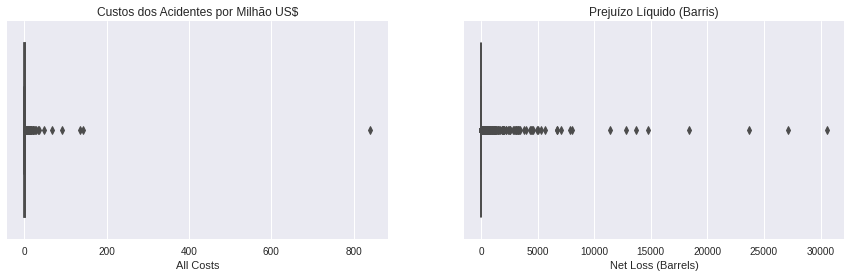

In [14]:
fig, ax = plt.subplots(1,2,figsize = (15,4))

sns.boxplot(data['All Costs'], data=data, ax = ax[0])
ax[0].set_title('Custos dos Acidentes por Milhão US$')

sns.boxplot(data['Net Loss (Barrels)'], data=data, ax = ax[1])
ax[1].set_title('Prejuízo Líquido (Barris)')

plt.show()

Mas esse não era para ser um boxplot? Cade a caixa? Isso indica que valores grandes nos dois dados são muito maiores relativamente aos outros dados. Poderíamos prever o custo de um acidente usando a mediana dos valores? É de fato um modelo, mas nesse caso, parece ser ruim dado os valores grandes. 

O que são esses valores grandes, afinal? Em alguns casos, podem realmente apresentar erros, mas nesse caso fica difícil de afirmar. 

Bom. Podemos, dados esses problemas, trabalhar com outra variável disponível: o tempo do acidente. Conhecemos uma família de distribuições de probabilidade que modela frequência de acidentes em um intervalo de tempo? 

**Distribuição de Poisson:** probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem independentemente de quando ocorreu o último evento.

De forma geral, podemos dizer que isso é verdade para acidentes de óleo. Assim, temos uma **variável aleatória** de interesser $X$, que indica o número de acidentes, já temos uma distribuição para essa variável (Poisson) e já temos o parâmetro $\lambda$ desconhecido. 



In [4]:
data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])
totaltimespan = np.max(data['Accident Date/Time']) - np.min(data['Accident Date/Time'])

totaltime_hour = (totaltimespan.days*24 + totaltimespan.seconds/(3600))
totaltime_month = (totaltimespan.days + totaltimespan.seconds/(3600*24)) *12/365

lmda_h = len(data) / totaltime_hour
lmda_m = len(data) / totaltime_month 

print('Número estimado de acidentes por hora: {}'.format(lmda_h)) 
print('Número estimado de acidentes por mês {}'.format(lmda_m))

Número estimado de acidentes por hora: 0.04540255169379675
Número estimado de acidentes por mês 33.14386273647162


/home/lucasmoschen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Poderíamos ter procedimentos para estimar $\lambda$, mas por hora, vamos tomar ele como a média das observações. Pela Lei dos Grandes Números, sabemos que a média da Poisson é $\lambda$ e a média amostral tende para ela.  

In [12]:
lamda = 33

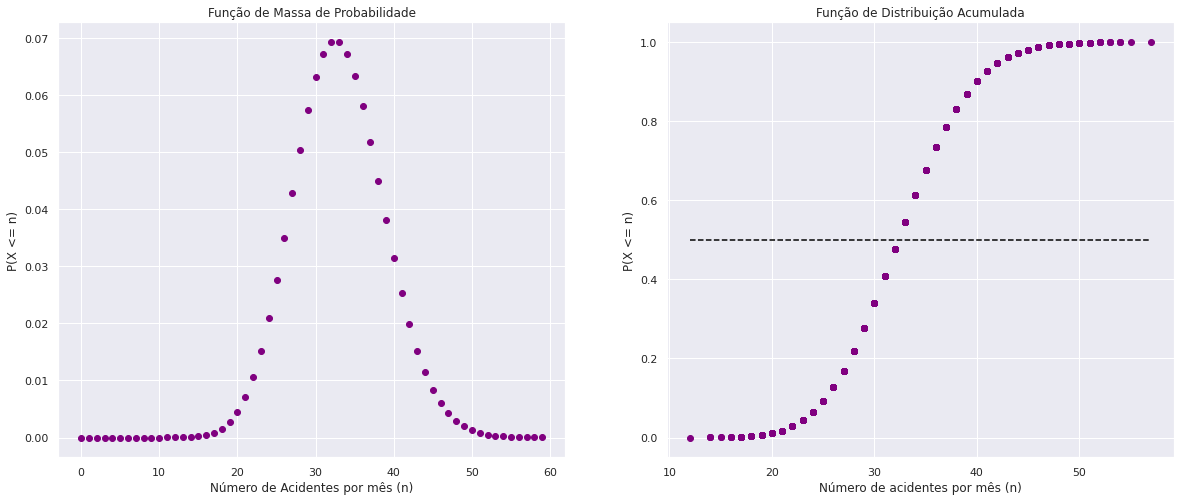

In [10]:
X = poisson(lamda)
I = np.arange(0,60,1)  #intervalo(0,60), passo = 1

samples_poisson = np.sort(np.random.poisson(lamda,10000)) 
Y = X.cdf(samples_poisson)     #função de densidade acumulada 

fig, ax  = plt.subplots(1,2,figsize = (20,8))
ax[0].scatter(I,X.pmf(I) , color = 'purple')
ax[0].set_xlabel('Número de Acidentes por mês (n)')
ax[0].set_ylabel('P(X <= n)')
ax[0].set_title('Função de Massa de Probabilidade')

ax[1].scatter(samples_poisson, Y, color = 'purple')
ax[1].hlines(0.5, xmin = min(samples_poisson), xmax = max(samples_poisson), 
             linestyle = '--', color = 'black')
ax[1].set_xlabel('Número de acidentes por mês (n)')
ax[1].set_ylabel('P(X <= n)')
ax[1].set_title('Função de Distribuição Acumulada')

plt.show()

A partir de nosso modelo, já podemos fazer acertações probabilística!

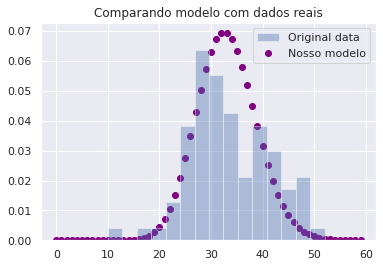

In [11]:
real_data = np.array(data['Accident Date/Time'].apply(lambda x: (x.year, x.month)))
accidents_count = {2010 + i: {m: 0 for m in range(1,13)} for i in range(8)}

for info in real_data:
    accidents_count[info[0]][info[1]] += 1

distribution = [accidents_count[y][m] for y in accidents_count.keys() for m in accidents_count[y].keys()]
distribution = distribution[:-12] #Tirando 2 observações de 2017 

fig, ax = plt.subplots()
sns.distplot(distribution, bins = 15, ax = ax, label = 'Original data', kde = False, norm_hist = True)
ax.scatter(I,X.pmf(I) , color = 'purple', label = 'Nosso modelo')
ax.legend()
ax.set_title('Comparando modelo com dados reais')
plt.show()